In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

def MSE(img1,img2):
    mse = np.mean( (img1 - img2) ** 2 )
    return mse


In [ ]:
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


In [ ]:
def ssim(y_true , y_pred):
    u_true = np.mean(y_true)
    u_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    std_true = np.sqrt(var_true)
    std_pred = np.sqrt(var_pred)
    R = 255
    c1 = np.square(0.01*R)
    c2 = np.square(0.03*R)
    ssim = (2 * u_true * u_pred + c1) * (2 * std_pred * std_true + c2)
    denom = (u_true ** 2 + u_pred ** 2 + c1) * (var_pred + var_true + c2)
    return ssim / denom


In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            img = img.resize((32, 32))
            img_array = np.array(img)
            images.append(img_array)
    return images

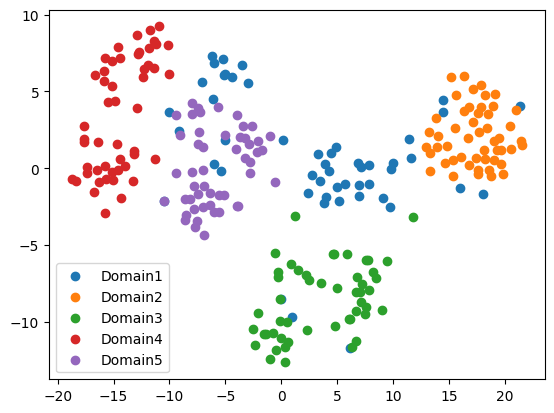

In [3]:
folders = ['./FedICRA-master/data/ODOC/Domain1/reconstrct/toDomain{}'.format(i) for i in range(1, 6)]
all_images = []
domains = []
for i, folder in enumerate(folders):
    images = load_images_from_folder(folder)
    domains.extend([i+1]*len(images))
    all_images.extend(images)

flattened_images = np.array([img.flatten() for img in all_images])
tsne = TSNE(n_components = 2)
tsne_results = tsne.fit_transform(flattened_images)

unique_domains = np.unique(domains)
for domain in unique_domains:
    indices = [i for i, d in enumerate(domains) if d == domain]
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label = 'Domain' + str(domain))

plt.legend()
plt.show()

